**Convolutional Neural Network (CNN) basierend auf die YOLO-Architektur zur Erkennung von deutschen Verkehrszeichen in Echtzeit mit dem GTSRB-Dataset**

Autoren: Laieb Ahmad, Enes Bayar, Mehmet Akif Onur & Mert-Can Öksuz
<br>
Datum: 19.08.2024
<br>
Modul: KI-DL/ML
<br>
Dozent: Prof. Dr. Stephan Schneider

## **Befehle zum Installieren/Upgraden von Packages** 
Hiert führen wir die Installation (und nach Bedarf ein Upgrade) wichtiger Python-Pakete durch, die für unser Projekt benötigt werden. Wir verwenden die Bash-Magie `%%bash`, um mehrere `pip install`-Befehle in einer einzigen Zelle auszuführen. Dadurch wird die Effizienz erhöht und der Code übersichtlicher gestaltet. 

Die folgenden Pakete werden aktualisiert:
- **Numpy**: Eine Bibliothek für numerische Berechnungen und Unterstützung von Arrays.
- **Pandas**: Eine leistungsstarke Bibliothek zur Datenmanipulation und -analyse.
- **Scikit-learn**: Ein Framework für maschinelles Lernen mit zahlreichen Algorithmen und Werkzeugen.
- **Scikit-image**: Eine Sammlung von Algorithmen zur Bildverarbeitung.
- **Pillow**: Eine Bibliothek zur Bildbearbeitung und -manipulation.
- **Imbalanced-learn**: Eine Bibliothek zur Behandlung von unausgewogenen Datensätzen im maschinellen Lernen.
- **Statsmodels**: Eine Bibliothek für statistische Modelle und Hypothesentests.
- **Matplotlib**: Ein Plotting-Toolkit zur Datenvisualisierung.
- **Seaborn**: Eine auf Matplotlib basierende Bibliothek zur statistischen Datenvisualisierung.
- **TensorFlow**: Ein Framework für maschinelles Lernen und Deep Learning.
- **Ultralytics**: Eine Bibliothek, die das YOLO-Framework für die Objekt- und Verkehrszeichenerkennung bereitstellt.

Durch die Verwendung dieser Bash-Zelle stellen wir sicher, dass alle erforderlichen Pakete auf dem neuesten Stand sind, um optimale Leistung und Kompatibilität während der Entwicklung zu gewährleisten.


In [ ]:
%%bash #Anstatt einzel % vor jedem Command, gesammelt in einer Zelle
pip install wandb --upgrade
pip install numpy --upgrade
pip install pandas --upgrade
pip install scikit-learn --upgrade
pip install scikit-image --upgrade
pip install pillow --upgrade
pip install imbalanced-learn --upgrade
pip install statsmodels --upgrade
pip install matplotlib --upgrade
pip install seaborn --upgrade
pip install tensorflow --upgrade
pip install ultralytics --upgrade

## **Laden von Packages** 
In diesem Abschnitt importieren wir die erforderlichen Bibliotheken, die für die Entwicklung und Ausführung unseres YOLOv5-Projekts notwendig sind. 

- **`from ultralytics import YOLO`**: Importiert das YOLO-Modul von Ultralytics, das für die Objekt- und Verkehrszeichenerkennung verwendet wird.
- **`import os`**: Ermöglicht den Zugriff auf Funktionen zur Interaktion mit dem Betriebssystem, wie das Verwalten von Dateipfaden und Verzeichnissen.
- **`import numpy as np`**: Importiert die Numpy-Bibliothek, die grundlegende Funktionen für numerische Berechnungen und Arrays bereitstellt.
- **`import pandas as pd`**: Importiert Pandas, das für die Datenmanipulation und -analyse verwendet wird, insbesondere für die Arbeit mit DataFrames.
- **`import cv2`**: Importiert OpenCV, eine Bibliothek für Computer Vision, die Funktionen zur Bild- und Videoverarbeitung bereitstellt.
- **`import shutil`**: Ermöglicht die Durchführung von Datei- und Verzeichnisoperationen, wie das Kopieren und Verschieben von Dateien.
- **`import matplotlib`**: Importiert Matplotlib, eine Bibliothek zur Datenvisualisierung, die häufig zur Erstellung von Diagrammen und Grafiken verwendet wird.
- **`import csv`**: Importiert die CSV-Bibliothek, die das Arbeiten mit CSV-Dateien zur Datenspeicherung und -verarbeitung erleichtert.
- **`import torch`**: Importiert PyTorch, ein Framework für maschinelles Lernen, das für die Implementierung und das Training von Deep-Learning-Modellen verwendet wird.

Durch diese Importe stellen wir sicher, dass wir alle notwendigen Funktionen und Werkzeuge zur Verfügung haben, um unser Projekt erfolgreich umzusetzen.


In [12]:
from ultralytics import YOLO
from helfer_funktionen import datensatz_entpacken_importieren, get_filenames, read_images, images_to_array, plot_images_with_annotations
from PIL import Image
import random
import os
import numpy as np
import pandas as pd
import cv2
import shutil
import matplotlib.pyplot as plt
import csv
import torch
import wandb

ImportError: cannot import name 'plot_images_with_annotations' from 'helfer_funktionen' (g:\Meine Ablage\projekt-cnn-yolo-echtzeiterkennung-verkehszeichen-gtsrb\helfer_funktionen.py)

## **Übersicht der Versionen von den genutzten Packages** 
In diesem Abschnitt überprüfen wir die installierten Versionen wichtiger Pakete, die in unserem Projekt verwendet werden. Wir nutzen `print()`-Befehle, um die Versionen der Pakete Numpy, Pandas, OpenCV, Matplotlib, CSV und PyTorch anzuzeigen. Dies ermöglicht uns, sicherzustellen, dass die richtigen Versionen installiert sind und die Kompatibilität zwischen den Bibliotheken gegeben ist. 


In [10]:
print("Package 'Numpy':",np.__version__)
print("Package 'Pandas':",pd.__version__)
print("Package 'OpenCV':",cv2.__version__)
print("Package 'CSV':",csv.__version__)
print("Package 'PyTorch':",torch.__version__)
print("Package 'WandB':",wandb.__version__)

Package 'Numpy': 1.26.4
Package 'Pandas': 2.2.3
Package 'OpenCV': 4.10.0
Package 'CSV': 1.0
Package 'PyTorch': 2.4.1+cpu
Package 'WandB': 0.18.3


## **Konfigurieren von WandB für das Tracking des Trainings** 
Um das Training des Modells zu überwachen und Metriken wie Verlust, Genauigkeit und Hyperparameter zu verfolgen, wird **Weights & Biases (WandB)** konfiguriert. WandB ist ein Tool zur Verwaltung und Visualisierung von Machine-Learning-Experimenten, das eine einfache Integration und Echtzeit-Überwachung ermöglicht.

- **Anmeldung bei WandB**: Durch den Befehl `wandb.login(key="YOUR_API_KEY")` authentifiziert sich das Skript über die API von WandB. Der API-Schlüssel muss durch deinen persönlichen Schlüssel von WandB ersetzt werden, der über dein WandB-Konto verfügbar ist.
- **Projekt-Tracking**: Nach der Authentifizierung werden automatisch alle Trainingsmetriken und Modellparameter an das WandB-Dashboard gesendet, wo sie in Echtzeit überwacht und analysiert werden können.

In [5]:
wandb.login(key="c1cb8293bb986e1a60106d41c29bde806ad72758")

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: laieb-ahmed (laieb-ahmed-fachhochschule-kiel). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\papa0\_netrc


True

## **Installieren von Yolov5** 
In diesem Abschnitt klonen wir das YOLOv5-Repository von GitHub, um auf den Quellcode und die Modelle zuzugreifen. Zuerst verwenden wir den Befehl `!git clone https://github.com/ultralytics/yolov5`, um das Repository auf unser lokales System herunterzuladen. Anschließend wechseln wir mit `%cd yolov5` in das Verzeichnis des geklonten Projekts, um dort weitere Schritte auszuführen. Schließlich installieren wir mit `%pip install -r requirements.txt` alle erforderlichen Abhängigkeiten, die für den Betrieb des YOLOv5-Modells notwendig sind.


In [ ]:
!git clone https://github.com/ultralytics/yolov5

%%bash
cd yolov5
pip install -r requirements.txt

## **Importieren des Datensatzes** 
Der Datensatz wird mit der Funktion datensatz_entpacken_importieren() importiert, die in einer separaten Datei namens helfer_funktionen.py implementiert ist. Diese Funktion nutzt die Kaggle-API, um den gewünschten Datensatz direkt von Kaggle herunterzuladen, zu entpacken und im Projektverzeichnis abzulegen.

In [5]:
datensatz_entpacken_importieren()

Datensatz valentynsichkar/yolo-v5-format-of-the-traffic-signs-dataset wird heruntergeladen....
Dataset URL: https://www.kaggle.com/datasets/valentynsichkar/yolo-v5-format-of-the-traffic-signs-dataset
Verzeichnis 'ts43classes' wird entpackt.... 
Verzeichnis 'ts43classes' erfolgreich nach ./data verschoben.
Import abgeschlossen.


## **Laden von Trainingsbildern** 
Eine Übersicht über die Versionen der einzelnen Packages/Frameworks. Das dient dazu, die Kompitabilität der Packages mit der Python-Version (oder mit der miniconda-Version) zu überwachen.

Form des Bilder-Arrays: (678, 200, 200, 3)


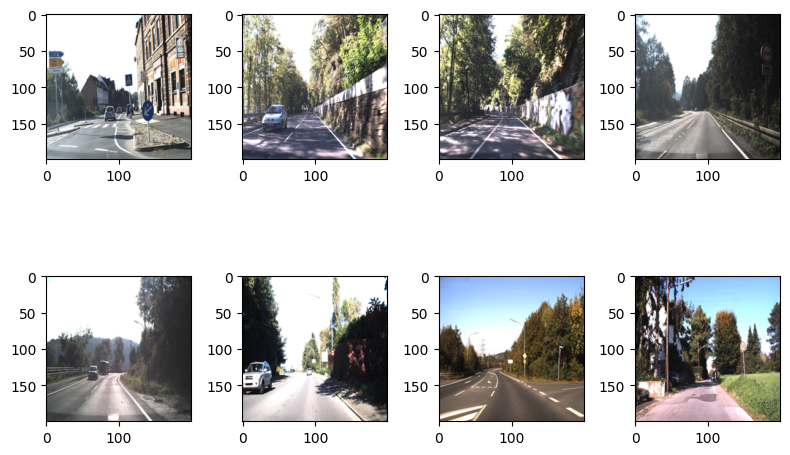

In [4]:
#Bezug zu Dateien herstellen
filepath = r"G:\Meine Ablage\projekt-cnn-yolo-echtzeiterkennung-verkehszeichen-gtsrb\data\images\train"
image_names = get_filenames(filepath)

#Parameter für das Laden der Bilder bestimmen
input_shape = {
    "height": 200,
    "width": 200,
    "channels": 3
}
images = read_images(image_names, height=input_shape["height"], width=input_shape["width"])

#Bilder einem Array übergeben
aimages = images_to_array(images)
print(f'Form des Bilder-Arrays: {aimages.shape}')

#Plotten des Arrays (mit den Bildern) - 8 Beispiele in einem 3x4 Raster
fig = plt.figure(figsize=(8, 8))
rows, columns = 3, 4 
num_images_to_display = min(8, aimages.shape[0])  

for i in range(num_images_to_display):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(aimages[i, ...])

plt.tight_layout()
plt.show()

## **Testen der korrekten Umwandlung der Annotation in das YOLO-Format** 


In [ ]:
# Ordner mit den Annotationen
label_path = r"G:\Meine Ablage\projekt-cnn-yolo-echtzeiterkennung-verkehszeichen-gtsrb\data\labels\train"

fig = plt.figure(figsize=(8, 8))
rows, columns = 3, 4
num_images_to_display = min(8, len(image_names))

for i in range(num_images_to_display):
    image_path = os.path.join(filepath, image_names[i])
    annotation_file = os.path.join(label_path, image_names[i].replace('.jpg', '.txt'))
    
    # Annotiertes Bild anzeigen
    annotated_image = draw_annotations(aimages[i], annotation_file, input_shape["width"], input_shape["height"])

    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(annotated_image)
    plt.axis('off')

plt.tight_layout()
plt.show()

PermissionError: [Errno 13] Permission denied: 'G:\\Meine Ablage\\projekt-cnn-yolo-echtzeiterkennung-verkehszeichen-gtsrb\\data\\labels\\train'

<Figure size 800x800 with 0 Axes>

## **Erstellen der yaml-Datei in dem Projektverzeichnis** 


[[3 4 5]
 [2 6 7]] (2, 3)
[[10  7]
 [ 5  2]
 [ 6  3]] (3, 2)
Das Ergebnis der Matrizen-Multiplikation ist: [[80 44]
 [92 47]]
20
